In [1]:
#importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleanng data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
df_US = df[df['job_country'] == 'United States']
df_skills = df_US.explode('job_skills')

In [15]:
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name = 'skill_count').sort_values('skill_count', ascending = False)
df_skills_count


,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [21]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

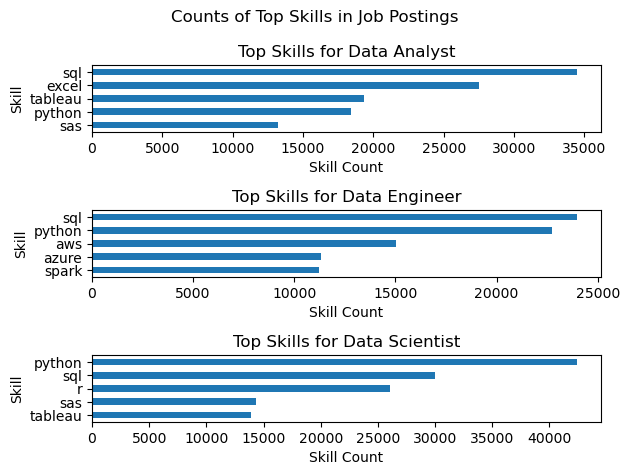

In [40]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], legend=False)
    ax[i].set_title(f"Top Skills for {title}")
    ax[i].invert_yaxis()
    ax[i].set_xlabel("Skill Count")
    ax[i].set_ylabel("Skill")

plt.suptitle('Counts of Top Skills in Job Postings')
plt.tight_layout()
plt.show()